In [13]:
import numpy as np
import pandas as pd
 
data = pd.read_csv('./boston_house_price_english.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
class LinearRegression:
    """使用ptyhon实现线性回归算法，使用梯度下降法"""
    def __init__(self,alpha,times):
        """初始化方法
        alpha : 学习率，用来控制步长（权重调整幅度）
        times : 循环迭代的次数
        """
        self.alpha = alpha
        self.times = times
    def fit(self,X,y):
        """根据提供的训练数据对模型进行训练
        X：类数组类型，形状[样本数量，特征数量]
            待训练的样本特征属性，特征矩阵
        y：类数组类型，形状[样本数量]
            目标值，标签的信息
        """
        X = np.asarray(X)
        y = np.asarray(y)
        #初始权重，权重向量初始值为0（或任何其他值），长度比X的特征数量多1（多出来的为截距）
        self.w_ = np.zeros(1 + X.shape[1])
        #创建损失列表，用来保存每次迭代后的损失值。损失值计算（损失函数）：（预测值-真实值）的平方和 再除以2
        self.lose_ = []
        #进行循环，多次迭代。在每次迭代过程中，不断去调整权重值，使得损失值不断减小
        for i in range(self.times):
            #计算预测值
            #np.dot(),计算点积
            y_hat = np.dot(X,self.w_[1:]) + self.w_[0]
            #计算真实值与预测值之间的差距
            error = y - y_hat
            #将损失加入到损失列表中
            self.lose_.append(np.sum(error ** 2) / 2)
            #根据差距（预测值与真实值），调整权重self.w_，根据公式调整为 权重(j) = 权重(j) + 学习率alpha * sum((y - y_hat) * x(j))
            self.w_[0] += self.alpha * np.sum(error)
            self.w_[1:] += self.alpha * np.dot(X.T,error)
            
    def predict(self,X):
        """根据传递的样本，对样本进行预测
        X：类数组类型，形状[样本数量，特征数量]
            测试的样本
        result:数组类型
            预测结果
        """
        X = np.asarray(X)
        result = np.dot(X,self.w_[1:]) + self.w_[0]
        return result

In [15]:
#data洗牌,造成数据特别大的原因是：原始数据的数量基相差特别大
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]
 
lr = LinearRegression(0.0005,20)
lr.fit(train_X,train_y)
result = lr.predict(test_X)
display(np.mean(result - test_y) ** 2)
display(lr.w_)
display(lr.lose_)

2.392038543062451e+194

array([-4.91840744e+91, -2.24201028e+92, -4.88461060e+92, -5.87006550e+92,
       -3.32031749e+90, -2.77875440e+91, -3.06624018e+92, -3.47870767e+93,
       -1.79024405e+92, -5.41134085e+92, -2.15329860e+94, -9.17485507e+92,
       -1.74958006e+94, -6.49542169e+92])

[116831.44,
 352143849427807.9,
 1.3577876251262878e+24,
 5.238506743432333e+33,
 2.0210852043054457e+43,
 7.797614241008516e+52,
 3.008422788323446e+62,
 1.1606893331181652e+72,
 4.478093083336439e+81,
 1.7277075864178825e+91,
 6.6657245586818545e+100,
 2.5717247664772105e+110,
 9.922054558792244e+119,
 3.828059983359124e+129,
 1.476916212198212e+139,
 5.698138240613041e+148,
 2.1984171573830045e+158,
 8.481784389555282e+167,
 3.2723846877424257e+177,
 1.2625293278803279e+187]

In [16]:
class StanderScaler:
    """对数据进行标准化处理。即均值为0，标准差为1
    """
    def fit(self,X):
        """根据传递的样本，计算每个特征列的均值和标准差。
        X:类数组类型
            训练数据，用来计算均值和标准差
        """
        X = np.asarray(X)
        self.std_ = np.std(X,axis=0)
        self.mean_ = np.mean(X,axis=0)
    
    def transform(self,X):
        """对给定的数据X，进行标准化处理。（将X的每一列都变成标准正态分布的数据）
        X:类数组类型
            待转换的数据
        result:类数组类型
            参数X转换成标准正态分布后的结果
        """
        return (X - self.mean_) / self.std_
    
    def fit_transform(self,X):
        """对数据进行训练并转换，返回转换后的结果
        X:类数组类型
            待转换的数据
        result:类数组类型
            参数X转换成标准正态分布后的结果
        """
        self.fit(X)
        return self.transform(X)

In [17]:
#为了避免每个特征数量级的不同，从而在梯度下降的过程中带来影响
#现在考虑对每个特征进行标准化处理
#data洗牌
s = StanderScaler()
data_s = s.fit_transform(data)
 
t = data_s.sample(len(data_s),random_state=0)
 
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]
 
lr = LinearRegression(0.0005,20)
lr.fit(train_X,train_y)
result = lr.predict(test_X)
display(np.mean(result - test_y) ** 2)
display(lr.w_)
display(lr.lose_)

2.177931527313668e-05

array([-0.00114618, -0.07387267,  0.03462771, -0.04408227,  0.07001642,
       -0.12091102,  0.31635171, -0.0117995 , -0.20371295,  0.10064493,
       -0.05091414, -0.17957876,  0.09456438, -0.38772127])

[189.32507977160466,
 101.8162359853163,
 84.84985614214801,
 76.08051389616998,
 70.75046606531761,
 67.3851157318033,
 65.18959079088295,
 63.704734621363315,
 62.66043645247718,
 61.8953766507846,
 61.31170165353474,
 60.849081288410645,
 60.46967543334447,
 60.149312703074095,
 59.872248038344374,
 59.628006924960715,
 59.4094609985671,
 59.21163924639833,
 59.03098404070166,
 58.86487947003171]

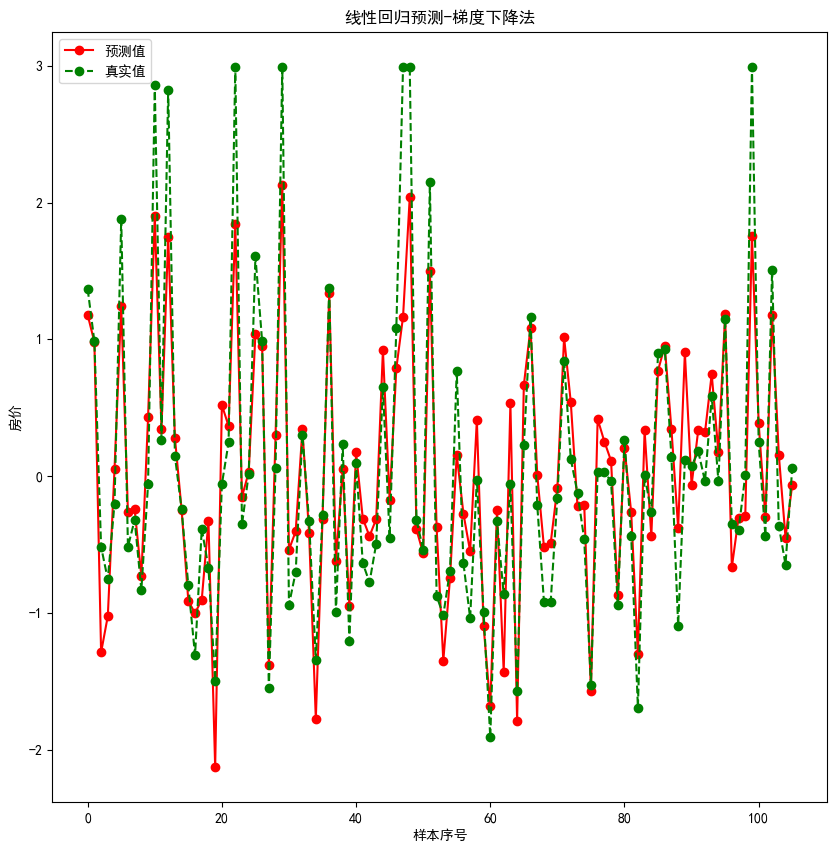

In [18]:
#直线拟合可视化
import matplotlib as mpl
import matplotlib.pyplot as plt 
#设置matplotlib 支持中文显示
mpl.rcParams['font.family'] = 'SimHei' #设置字体为黑体
mpl.rcParams['axes.unicode_minus'] = False #设置在中文字体是能够正常显示负号（“-”）
 
plt.figure(figsize=(10,10))
#绘制预测值
plt.plot(result,'ro-',label="预测值")
plt.plot(test_y.values,'go--',label="真实值")
plt.title("线性回归预测-梯度下降法")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()